In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x_train = np.load(r'output\clip\model\x_train.npy')
y_train = np.load(r'output\clip\model\y_train.npy')

In [5]:
print('Num samples:', x_train.shape[0])
print('Num features:', x_train.shape[1])
print('Num voxels:', y_train.shape[1])

Num samples: 8472
Num features: 4096
Num voxels: 94578


In [9]:
# Our ridge regression is voxelwise, so it maps the linear relationship between all features and a single voxel.
# Let's make a function that plots the points of the linear relationship between a feature and a voxel.
def plot_voxel(voxel, feature):
    plt.scatter(x_train[:, feature], y_train[:, voxel])
    plt.xlabel(f'Feature {feature}')
    plt.ylabel('Voxel ' + str(voxel))
    plt.show()

In [ ]:
# Let's loop through some random voxels and features to see the linear relationship between them.
for i in range(5):
    voxel = np.random.randint(y_train.shape[1])
    feature = np.random.randint(x_train.shape[1])
    plot_voxel(voxel, feature)

In [12]:
# Assuming x_train is a numpy array of shape (8472, 4096)
feature_stats = pd.DataFrame({
    'mean': np.mean(x_train, axis=0),
    'std': np.std(x_train, axis=0),
    'min': np.min(x_train, axis=0),
    'max': np.max(x_train, axis=0)
})

print(feature_stats.describe())


              mean          std          min          max
count  4096.000000  4096.000000  4096.000000  4096.000000
mean     -0.002377     0.156128    -0.412598     0.407471
std       0.362061     0.097473     0.457520     0.448975
min      -3.109375     0.044464    -5.652344    -1.925781
25%      -0.228424     0.088867    -0.618652     0.115936
50%       0.001793     0.130127    -0.335205     0.335205
75%       0.227081     0.180054    -0.114731     0.610107
max       3.917969     1.514648     2.851562     6.117188


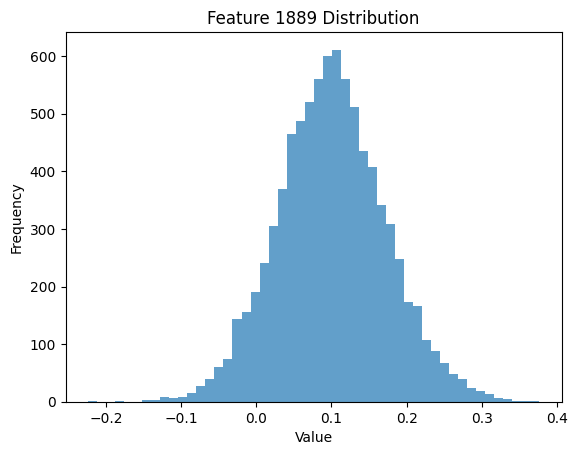

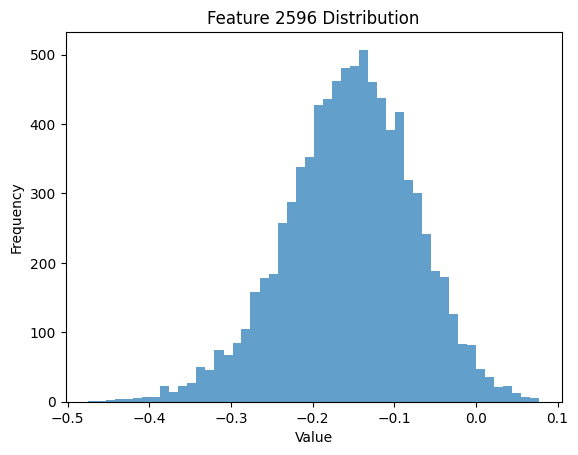

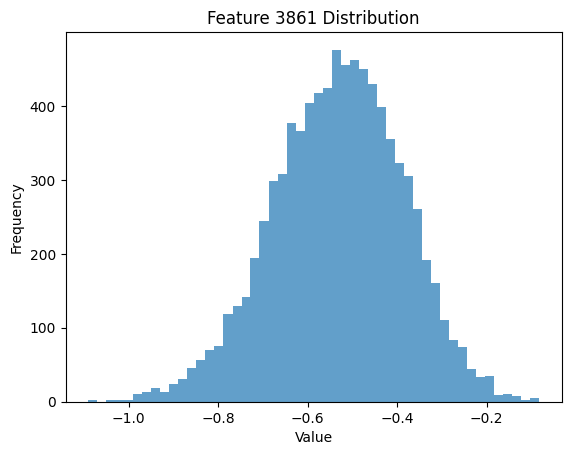

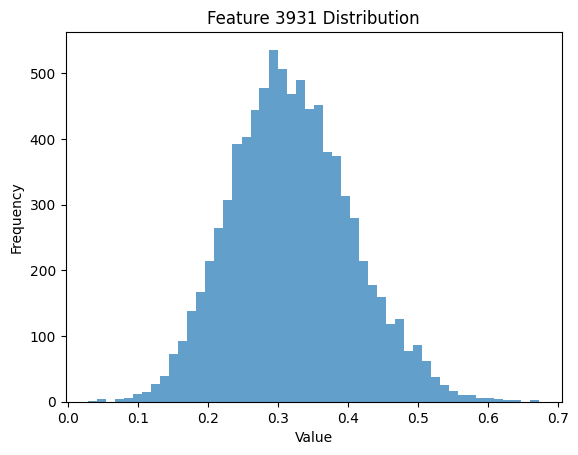

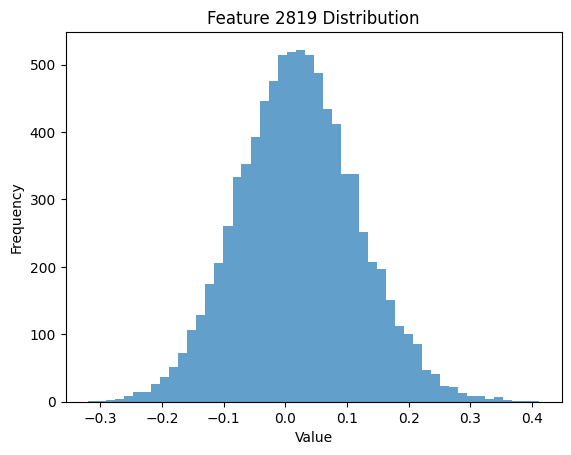

In [13]:
# Plotting histograms for a few random features
for i in np.random.choice(x_train.shape[1], 5, replace=False):
    plt.figure()
    plt.hist(x_train[:, i], bins=50, alpha=0.7)
    plt.title(f'Feature {i} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

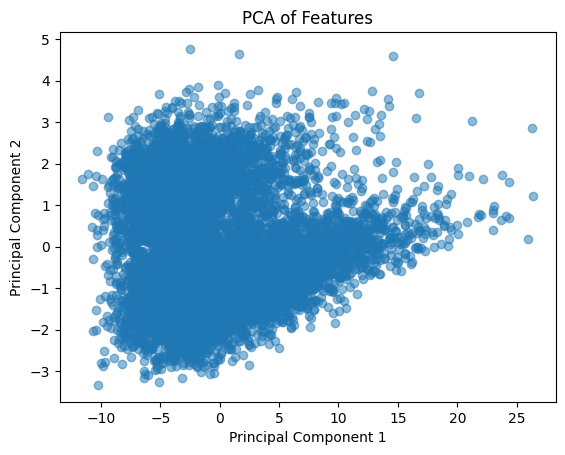

In [14]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

# Plot the first two principal components
plt.figure()
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.5)
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

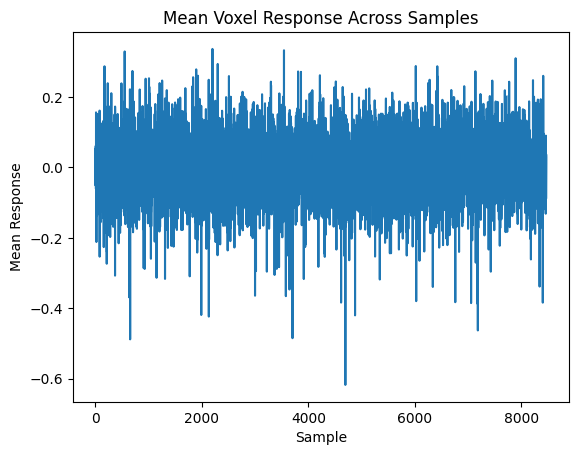

In [15]:
# Mean voxel response across all voxels
mean_voxel_response = np.mean(y_train, axis=1)

plt.figure()
plt.plot(mean_voxel_response)
plt.title('Mean Voxel Response Across Samples')
plt.xlabel('Sample')
plt.ylabel('Mean Response')
plt.show()

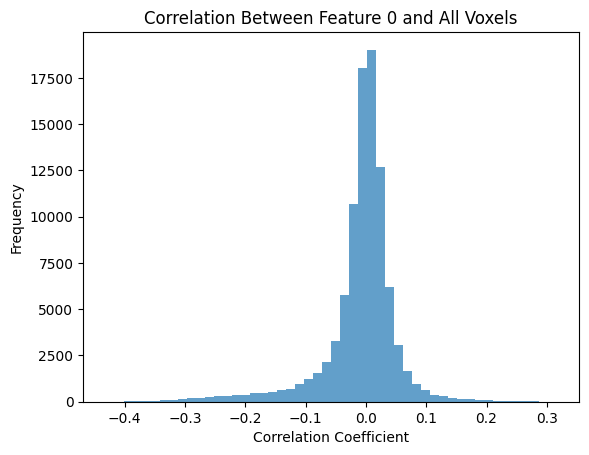

In [16]:
from scipy.stats import pearsonr

# Example: Correlation between one feature and all voxels
feature_idx = 0  # You can change this index
correlations = np.array([pearsonr(x_train[:, feature_idx], y_train[:, v])[0] for v in range(y_train.shape[1])])

plt.figure()
plt.hist(correlations, bins=50, alpha=0.7)
plt.title(f'Correlation Between Feature {feature_idx} and All Voxels')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

## Coefficents

In [18]:
coef = np.load(r'output\clip\model\encoding_model.npy')

In [20]:
coef.shape

(4096, 94578)

Text(0, 0.5, 'Coefficient Value')

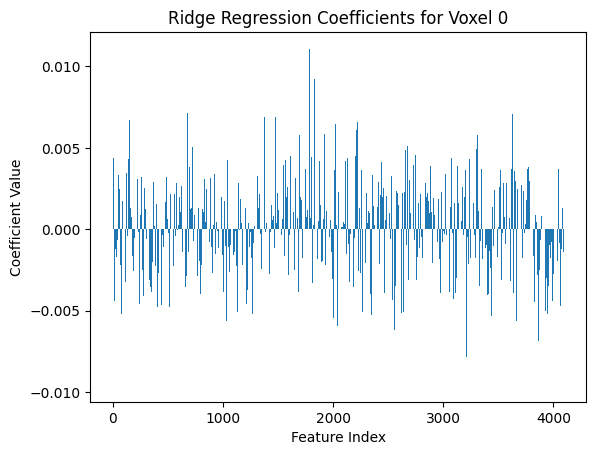

In [22]:
# Let's visualize the coefficients of the ridge regression model for a specific voxel
voxel_idx = 0  # You can change this index
plt.figure()
plt.bar(range(coef.shape[0]), coef[:, voxel_idx])
plt.title(f'Ridge Regression Coefficients for Voxel {voxel_idx}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')